## An Introduction to Python and Databases

Almost every other computer application from a web based application to a simple desktop application stores and retrieves information from some persistent storage. This storage could be a local hard drive or a remote repository or anything. The reason why most recent computer applications are doing what they can is because they have the capability to access and modify data from such storage locations. Such a storage location could be simply termed as a "Database". 

Now, the type of data that is stored in the application could be in a structured form like tables in which the information in each column has some relation to the information in the other.

Some types of structured databases (SQL) are MySQL, Oracle, SQLite etc. Similarly, we can also have data stored in semi-structured form. Such types of databases are referred to as NoSQL (Not just SQL). Some types of NoSQL are MongoDB, Cassandra etc.

### Python in Database Management

Well, we do have explicit ways to mess around with databases. We can learn SQL (Structured Query Language) or NoSQL (Not just SQL) to manage databases. Well, well, well, we also need different GUIs/ applications to access such databases. As usual, “Python” to the rescue. We can access databases and play with them directly using Python. All we need is to establish a connection between the Database server and Python. Then just execute the database queries as easy as eating a piece of cake from within Python.

In this introductory article, we try to understand how to establish a connection between a database server and Python. We are choosing MySQL, a form of structured database. The only requirement for us to proceed further is have MySQL workbench installed in our systems. MySQL workbench need to be kept open while working with MySQL through Python. This is essential as the MySQL server needs to be active whilst Python is trying to establish a connection.

## Establishing Connection between Python and MySQL

Python uses the "connector" method from "mysql" module to establish the connection. 

In addition, we need the MySQL host name, MySQL user name and MySQL passoword to proceed. 

This is available under Database - Connect Database. Password is the MySQL password set during installation. 

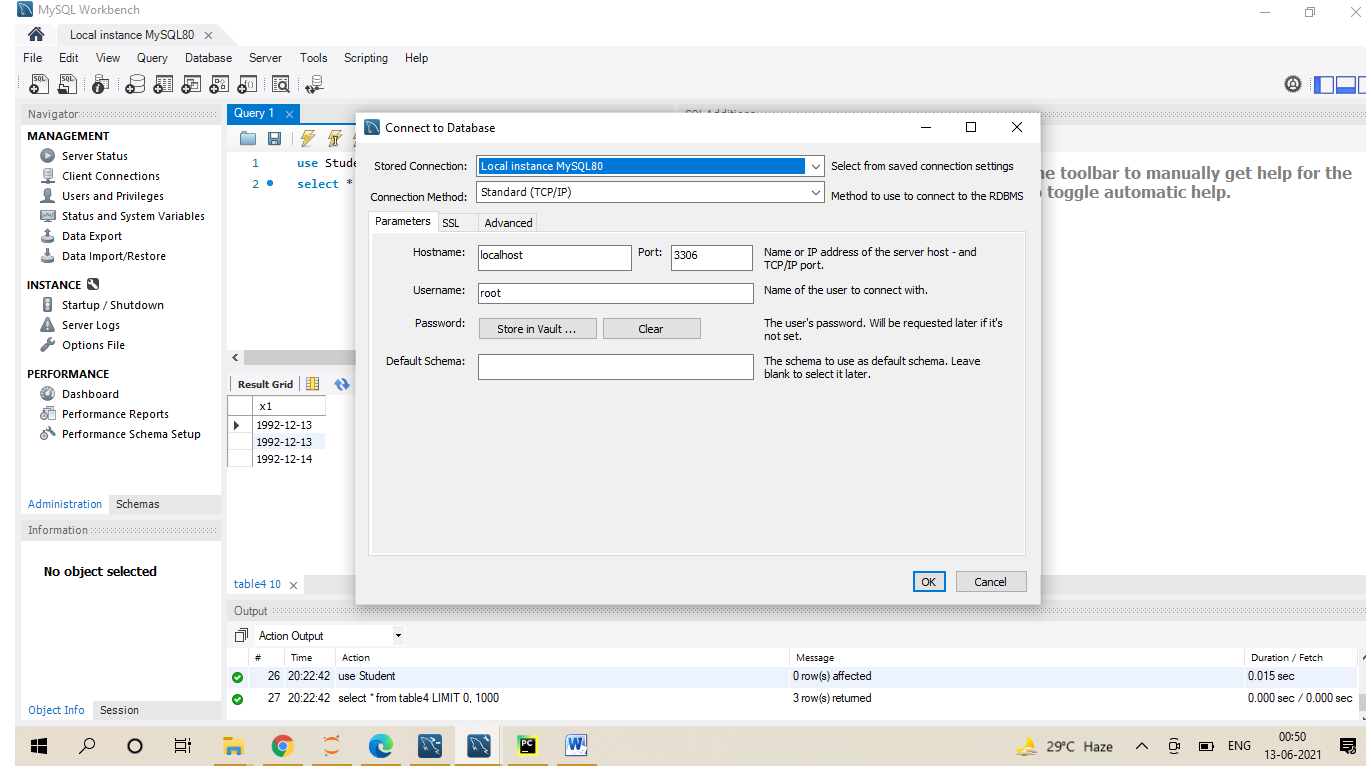

### Here we go !!!!!!!!!!

In [1]:
#Importing connection modules
import mysql.connector as connection

try:
    #Establishing connection
    mydb = connection.connect(host="localhost", user="root", passwd="mysql",use_pure=True)
    
    # check if the connection is established
    if mydb.is_connected():
        print('Database Connection Established')
    
    mydb.close()

    except Exception as e:
    print(str(e))

Database Connection Established


## What does the code say ...

Line number 1 imports the necessary modules. 

Line number 6 establishes the connection between MySQL and Python. The is_connection() method returns True if the connection gets established successfully. 

Just like file operations, it is always good to close the DB connection once done using the close()


Simple, right?

## Creating a Database

Let us try creating a MySQL database

In [3]:
#Importing connection modules
import mysql.connector as connection

try:
    #Establishing connection
    mydb = connection.connect(host="localhost", user="root", passwd="mysql",use_pure=True)
    
    # check if the connection is established
    if mydb.is_connected():
        print('Database Connection Established')
    
    #SQL Query that targets the requirement, this is the actual SQL statement
    query = "Create database Employee;"
    
    #Setting up a cursor to track the cursor movement in the Database
    #create a cursor to execute queries
    cursor = mydb.cursor() 
    
    #execute() performs the action corresponding to the query
    cursor.execute(query)
    
    print("Database Created!!")
    
    #As usual, close the DB connection once done with it
    mydb.close()

except Exception as e:
    print(str(e))

Database Connection Established
Database Created!!


## What does the code say ...

As usual, we start with establishing the connection with MySQL. 

Now we step a bit ahead, we create a cursor. Cursor is basically created to capture the cursor's position within the database as an when new queries get executed. In other terms, cursor is a pointer to the query. 

Query is the actual SQL query used to achieve the action in MySQL

The cursor.execute() executes the query. Always remember, the queries should be in STRING format

Going forward, we just need to know what are the different queries.

Simple, right?

## Obtaining a list of existing Databases

Now that we have created a new database, we should be able to see this in the list of databases available.

In [4]:
import mysql.connector as connection

try:
    mydb = connection.connect(host="localhost",user="root", passwd="mysql",use_pure=True)
    # check if the connection is established

    #As I said, it is just about the new queries, everything else is the same
    query = "SHOW DATABASES"

    cursor = mydb.cursor() #create a cursor to execute queries
    cursor.execute(query)
    
    #the fetchall() is kind of mandatory if we want to actually fetch some info from the Database 
    #and get it displayed through Python
    print(cursor.fetchall())

except Exception as e:
    mydb.close()
    print(str(e))

[('employee',), ('information_schema',), ('mysql',), ('performance_schema',), ('sakila',), ('student',), ('sys',), ('trial1',), ('world',)]


## Creating a Table within a Database

We are currently dealing with structured databases. The information in such databases are stored in forms of tables. One database can have multiple tables.

In [5]:
import mysql.connector as connection

try:
    #database connection is modifed to access the databse under consideration
    mydb = connection.connect(host="localhost", database = 'Employee',user="root", passwd="mysql",use_pure=True)
    
    # check if the connection is established
    print(mydb.is_connected())
    
    #EmployeeDetails is the table name
    #Employee ID, FirstName, LastName, JoiningDate and Team are column names followed by the type of data to it has
    #The number in the bracket represents the length of the content in the corresponding cell
    
    query = "CREATE TABLE EmployeeDetails (Employeeid INT(10), FirstName VARCHAR(60)," \
            "LastName VARCHAR(60), JoiningDate DATE,Team Varchar(20))"

    cursor = mydb.cursor() #create a cursor to execute queries
    cursor.execute(query)
    print("Table Created!!")
    mydb.close()
except Exception as e:
    mydb.close()
    print(str(e))

True
Table Created!!


## Cross Checking the updated Table using MySQL

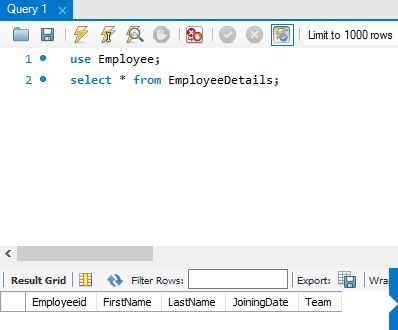

### As we can see, an empty table has been created in the Employee Database

In [7]:
import mysql.connector as connection

try:
    #database connection is modifed to access the databse under consideration
    mydb = connection.connect(host="localhost", database = 'Employee',user="root", passwd="mysql",use_pure=True)
    
    # check if the connection is established
    print(mydb.is_connected())
    
    #EmployeeDetails is the table name
    #Employee ID, FirstName, LastName, JoiningDate and Team are column names followed by the type of data to it has
    #Just use the INSERT INTO <Table Name> VALUES and enter the values in the exact sequence as the columns are defined
    
    query = "INSERT INTO EmployeeDetails VALUES ('1132','John','Doe','1997-11-11','Senior Management')"

    #Remember, the DATE should be entered in YYYY-MM-DD format
    
    cursor = mydb.cursor() #create a cursor to execute queries
    cursor.execute(query)
    print("Values inserted into the table!!")
    
    #commit() is mandatory to ensure the update reflects in the actual database
    mydb.commit()
    
    mydb.close()
except Exception as e:
    mydb.close()
    print(str(e))

True
Values inserted into the table!!


## Cross Checking the updated Table using MySQL again

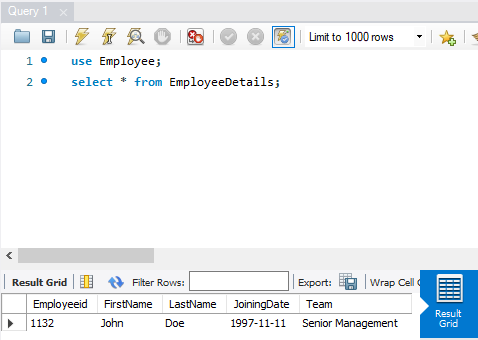

### As we can see, a new row of the entered data is now added to the EmployeeDetails table

## Entering multiple lines of information to a Table

In [8]:
import mysql.connector as connection

try:
    #database connection is modifed to access the databse under consideration
    mydb = connection.connect(host="localhost", database = 'Employee',user="root", passwd="mysql",use_pure=True)
    
    # check if the connection is established
    print(mydb.is_connected())
    
    #EmployeeDetails is the table name
    #Employee ID, FirstName, LastName, JoiningDate and Team are column names followed by the type of data to it has
    #Just use the INSERT INTO <Table Name> VALUES and enter the values in the exact sequence as the columns are defined
    
    query1 = "INSERT INTO EmployeeDetails VALUES ('1133','John','Reese','1982-12-11','Senior Security')"
    query2 = "INSERT INTO EmployeeDetails VALUES ('1134','Harold','Finch','1974-12-09','Admin')"
    query3 = "INSERT INTO EmployeeDetails VALUES ('1135','Root','Groves','1978-09-11','Senior Research')"

    #Remember, the DATE should be entered in YYYY-MM-DD format
    
    #create a cursor to execute queries
    #Curosor position gets updated with queries execution
    
    cursor = mydb.cursor() 
    cursor.execute(query1)
    cursor.execute(query2)
    cursor.execute(query3)
    print("Values inserted into the table!!")
    
    #commit() is mandatory to ensure the update reflects in the actual database
    mydb.commit()
    
    mydb.close()
except Exception as e:
    mydb.close()
    print(str(e))

True
Values inserted into the table!!


## Cross Checking the updated Table using MySQL again

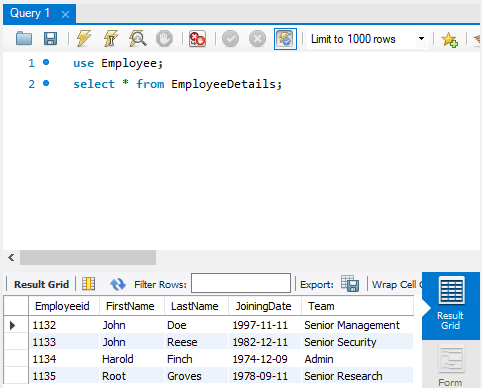

### As we can see, a new rows of the entered data is now added to the EmployeeDetails table

## Entering multiple rows of data in one go ...

This can be achieved very easily using Pandas, but through conventional methods, if all the information is stored in a .csv file, we could enter a whole lot of information in one go.

If the data from external file is not in .csv format, we can convert it to .csv format 

Thanks to ineuron.ai for this bit of code. Please ensure, there is a database "GlassData" exists before executing the code.

In [15]:
import mysql.connector as connection
import pandas as pandas
import csv
import os

os.chdir("C:\\Users\\arvind_hhp\\19.2.MySQL")

try:
    #Establish a new connection to the database created above
    mydb = connection.connect(host="localhost", database = 'GlassData',user="root", passwd="mysql", use_pure=True)

    #create a new table to store glass data
    query = "CREATE TABLE IF NOT EXISTS GlassData (Index_Number INT(10),RI float(10,5), Na float(10,5), Mg float(10,5),Al float(10,5)," \
            " Si float(10,5), K float(10,5), Ca float(10,5), Ba float(10,5), Fe float(10,5), Class INT(5))"
    cursor = mydb.cursor()  # create a cursor to execute queries
    cursor.execute(query)
    print("Table Created!!")

    #read from the file
    with open('glass.data', "r") as f:
        
        #This is done to skip the first line which has the column names
        next(f)
        
        #Converting the file into .csv file
        glass_data = csv.reader(f, delimiter="\n")
        
        #Reading line by line
        for line in enumerate(glass_data):
            
            #Enumerate returns a tuple of serial number and list of items in the line
            #The data to be fed is the second item in the tuple, so [1]
            for list_ in (line[1]):
                cursor.execute('INSERT INTO GlassData values ({values})'.format(values=(list_)))
                
    print("Values inserted!!")
    mydb.commit()
    cursor.close()
    mydb.close()

except Exception as e:
    #mydb.close()
    print(str(e))

Table Created!!
Values inserted!!


## Cross Checking the updated Table using MySQL again

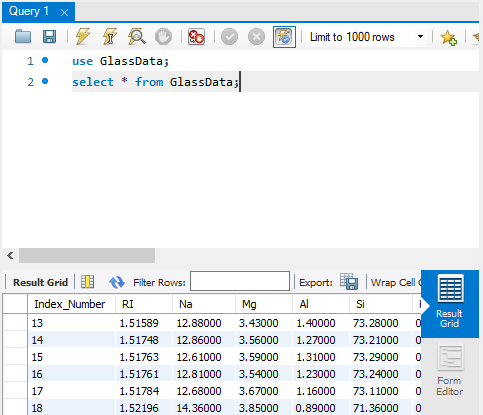

### As we can see, a bunch of new rows added